<a href="https://colab.research.google.com/github/np03cs4a240060-bit/Concepts-and-Technologies-of-AI/blob/main/Worksheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI Workshop/bank.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
obj_cols = df.select_dtypes(include="object").columns
obj_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
for col in obj_cols:
    print("\nColumn:", col)
    print(df[col].unique())


Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
['married' 'single' 'divorced']

Column: education
['tertiary' 'secondary' 'unknown' 'primary']

Column: default
['no' 'yes']

Column: housing
['yes' 'no']

Column: loan
['no' 'yes']

Column: contact
['unknown' 'cellular' 'telephone']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
['unknown' 'failure' 'other' 'success']

Column: y
['no' 'yes']


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df_numeric = df.drop(columns=obj_cols)
df_numeric.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [ ]:
df_numeric.to_csv("banknumericdata.csv", index=False)

In [ ]:
bn = pd.read_csv("banknumericdata.csv")
bn.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2

In [ ]:
import pandas as pd

In [ ]:
# 1
df = pd.read_csv("/content/drive/MyDrive/AI Workshop/medical_students_dataset.csv")

# 2.
print(df.isnull().sum())

# 3.
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# 4.
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()
print("After removing:", df.duplicated().sum())

df

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
Duplicates: 12572
After removing: 0


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.000000,18.000000,Female,161.777924,72.354947,O,27.645835,98.600948,95.0,109.000000,203.0,No,No
1,2.000000,26.021561,Male,152.069157,47.630941,B,23.338869,98.714977,93.0,104.000000,163.0,No,No
2,3.000000,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,49974.042078,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,5.000000,23.000000,Female,174.947103,46.234173,O,23.338869,98.480008,95.0,114.558033,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,49974.042078,24.000000,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.000000,130.0,No,No
199996,99997.000000,29.000000,Female,163.917675,45.225194,B,16.831734,97.865785,62.0,125.000000,198.0,No,Yes
199997,99998.000000,34.000000,Female,174.947103,99.648914,B,33.189303,98.768210,60.0,90.000000,154.0,No,No
199998,99999.000000,30.000000,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.000000,225.0,No,No


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0

Null Age values: 30

Modified DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.

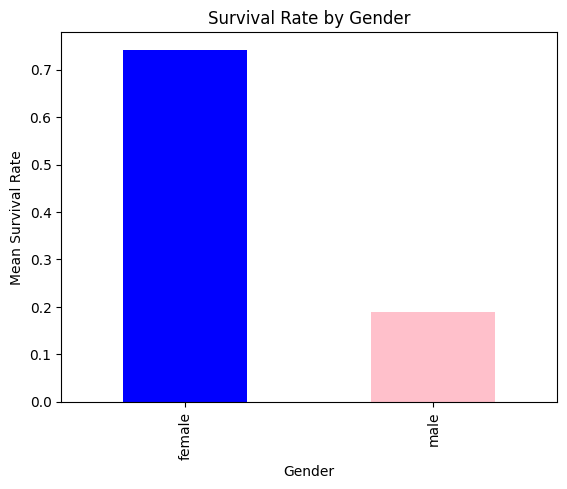

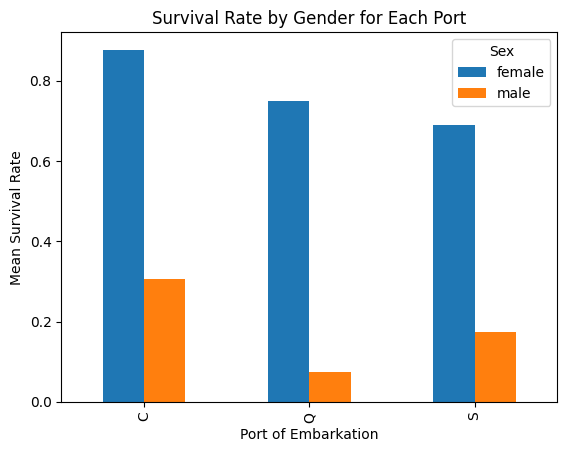

/tmp/ipython-input-2155453165.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['AgeGroup'] = pd.qcut(df_age['Age'], 5)
/tmp/ipython-input-2155453165.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age_pclass = df_age.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()



Survival Rate by Age Group and Passenger Class:

Pclass                1         2         3
AgeGroup                                   
(0.419, 19.0]  0.809524  0.742857  0.333333
(19.0, 25.0]   0.761905  0.400000  0.197674
(25.0, 31.8]   0.666667  0.416667  0.283582
(31.8, 41.0]   0.777778  0.461538  0.166667
(41.0, 80.0]   0.506667  0.363636  0.088235


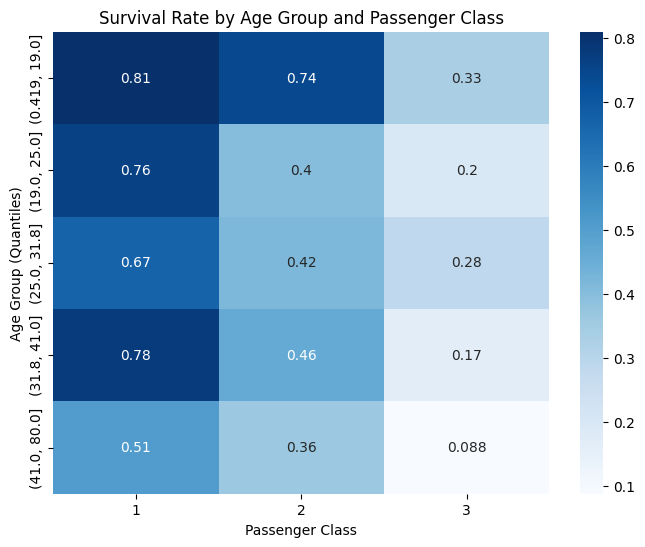

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/AI Workshop/Titanic-Dataset.csv")


#  Problem 1
sub = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

sub1 = sub[sub['Pclass'] == 1]
print("Mean Fare:", sub1['Fare'].mean())
print("Median Fare:", sub1['Fare'].median())
print("Max Fare:", sub1['Fare'].max())
print("Min Fare:", sub1['Fare'].min())


# Problem 2
print("\nNull Age values:", sub1['Age'].isnull().sum())
sub1_clean = sub1.dropna(subset=['Age'])


# Problem 3
emb = pd.get_dummies(df['Embarked'], prefix='Embarked')
df_new = pd.concat([df, emb], axis=1)
df_new = df_new.drop(columns=['Embarked'])

print("\nModified DataFrame:")
print(df_new.head())


# Problem 4
mean_survival = df.groupby('Sex')['Survived'].mean()
print("\nMean Survival Rates by Gender:\n", mean_survival)

mean_survival.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel("Gender")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()


#Problem 5
survival_embarked = df.groupby(['Embarked', 'Sex'])['Survived'].mean()

survival_embarked.unstack().plot(kind='bar')
plt.xlabel("Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Gender for Each Port")
plt.show()


# Problem 6

# Drop null ages or qcut will fail
df_age = df.dropna(subset=['Age'])

# Create age quantile groups
df_age['AgeGroup'] = pd.qcut(df_age['Age'], 5)

# Group survival rate by AgeGroup and Passenger Class
survival_age_pclass = df_age.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()
print("\nSurvival Rate by Age Group and Passenger Class:\n")
print(survival_age_pclass)

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(survival_age_pclass, annot=True, cmap="Blues")
plt.title("Survival Rate by Age Group and Passenger Class")
plt.ylabel("Age Group (Quantiles)")
plt.xlabel("Passenger Class")
plt.show()
